In [1]:
ls

 predict/         'predict result.ipynb'  'sort data.csv'
 predict-2nd.csv   sample_solution.csv


In [57]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# File paths
predicted_file = 'predict-2nd.csv'  # File containing the predicted labels (one-hot encoded)
real_file = 'sample_solution.csv'  # File containing the real labels (one-hot encoded)

# Load the predicted and real data from CSV
predicted_df = pd.read_csv(predicted_file)
real_df = pd.read_csv(real_file)

In [63]:
predicted_df['prediction'][0]

'[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]'

In [64]:
import numpy as np
import ast

def safe_eval(x):
    if isinstance(x, str):  # If the value is a string (like '[0.0, 0.0, 0.0]')
        return ast.literal_eval(x)  # Convert to actual list
    return x  # If it's already a list, just return it

predicted_labels = predicted_df['prediction'].apply(lambda x: np.argmax(safe_eval(x), axis=0)).values
real_labels = real_df['labels'].apply(lambda x: np.argmax(safe_eval(x), axis=0)).values

print(predicted_labels)
print(real_labels)


[ 7  0 22 ...  6  1 10]
[21  4  6 ...  5 13 16]


In [65]:
predicted_labels.shape,real_labels.shape

((2505,), (2505,))

In [66]:
accuracy = accuracy_score(real_labels, predicted_labels)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 3.51%


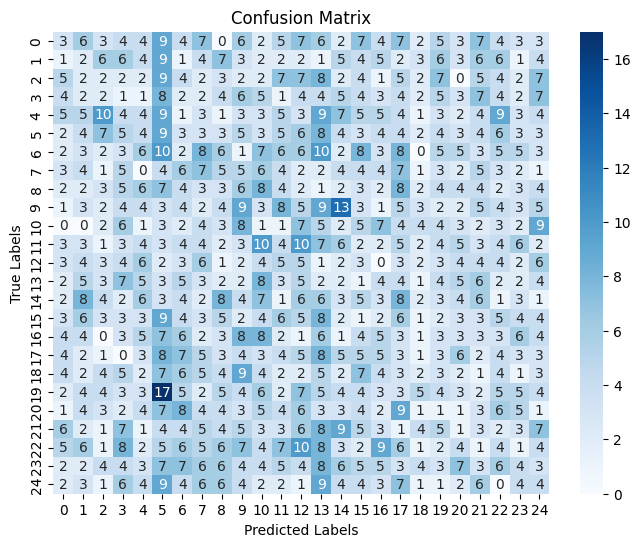

In [67]:

# Generate confusion matrix
conf_matrix = confusion_matrix(real_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(conf_matrix.shape[0]), yticklabels=range(conf_matrix.shape[0]))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()